In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import glob
import os

In [10]:
JC_jan = pd.read_csv("../data/jc_citibike_data/2019/JC-201901-citibike-tripdata.csv")
JC_feb = pd.read_csv("../data/jc_citibike_data/2019/JC-201902-citibike-tripdata.csv")
JC_mar = pd.read_csv("../data/jc_citibike_data/2019/JC-201903-citibike-tripdata.csv")
JC_apr = pd.read_csv("../data/jc_citibike_data/2019/JC-201904-citibike-tripdata.csv")
JC_may = pd.read_csv("../data/jc_citibike_data/2019/JC-201905-citibike-tripdata.csv")
JC_jun = pd.read_csv("../data/jc_citibike_data/2019/JC-201906-citibike-tripdata.csv")
JC_jul = pd.read_csv("../data/jc_citibike_data/2019/JC-201907-citibike-tripdata.csv")
JC_aug = pd.read_csv("../data/jc_citibike_data/2019/JC-201908-citibike-tripdata.csv")
JC_sept = pd.read_csv("../data/jc_citibike_data/2019/JC-201909-citibike-tripdata.csv")

In [11]:
JC_master = pd.concat([JC_jan,JC_feb,JC_mar,JC_apr,JC_may,JC_jun,JC_jul,JC_aug,JC_sept])

In [12]:
JC_master.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [13]:
JC_master['starttime'] = pd.to_datetime(JC_master.starttime)
JC_master['stoptime'] = pd.to_datetime(JC_master.stoptime)

JC_master['month'] = JC_master['starttime'].dt.month
JC_master['dayyear'] = JC_master['starttime'].dt.dayofyear
JC_master['dayweek'] = JC_master['starttime'].dt.dayofweek
JC_master['daymonth'] = JC_master['starttime'].dt.day
JC_master['hour'] = JC_master['starttime'].dt.hour
JC_master['date'] = JC_master['starttime'].dt.date

In [14]:
JC_master.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'month', 'dayyear', 'dayweek', 'daymonth',
       'hour', 'date'],
      dtype='object')

In [15]:
JC_master['tripduration'].max()

1729020

(array([10955., 27246., 41728., 44319., 33676., 25795., 20185., 16072.,
        12556.,  9701.,  7980.,  6464.,  5376.,  4554.,  3831.,  3415.,
         3031.,  2604.,  2340.,  1999.,  1927.,  1689.,  1537.,  1470.,
         1328.,  1212.,  1192.,  1124.,  1082.,   986.,   826.,   725.,
          675.,   620.,   566.,   529.,   530.,   501.,   485.,   459.,
          461.,   442.,   399.,   374.,   358.,   255.,   210.,   187.,
          177.,   176.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22, 40.2 , 41.18, 42.16, 43.14, 44.12,
        45.1 , 46.08, 47.06, 48.04, 49.02, 50.  ]),
 <a list of 50 Patch objects>)

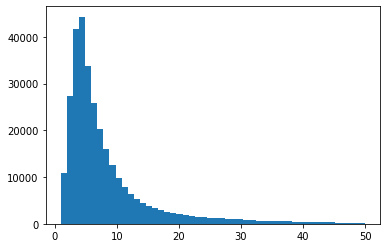

In [16]:
plt.hist(JC_master['tripduration']/60, range = (1,50), bins = 50)

Text(0, 0.5, 'Duration (minutes)')

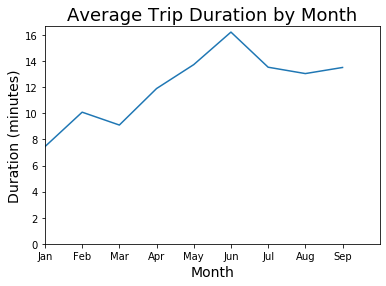

In [17]:
ax = (JC_master.groupby('month').tripduration.mean()/60).plot()

ax.set_ylim(0)
ax.set_xlim(1, 10)
plt.xticks(range(1,10), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

plt.title('Average Trip Duration by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)

In [18]:
demographics = JC_master[(JC_master['gender'].isin(['1', '2']))]
demographics.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,month,dayyear,dayweek,daymonth,hour,date
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,...,29612,Subscriber,1993,1,1,1,1,1,3,2019-01-01
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,...,29213,Subscriber,1972,2,1,1,1,1,5,2019-01-01
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,...,26164,Subscriber,1985,1,1,1,1,1,10,2019-01-01
5,737,2019-01-01 12:56:53.204,2019-01-01 13:09:11.040,3183,Exchange Place,40.716247,-74.033459,3205,JC Medical Center,40.716540,...,29447,Subscriber,1993,1,1,1,1,1,12,2019-01-01
6,917,2019-01-01 13:03:44.776,2019-01-01 13:19:02.769,3183,Exchange Place,40.716247,-74.033459,3277,Communipaw & Berry Lane,40.714358,...,29299,Subscriber,1986,1,1,1,1,1,13,2019-01-01


In [19]:
demographics['age']  = 2019 - demographics['birth year']
demographics.tail()

C:\Users\erikl\Anaconda2\envs\AppliedDataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,month,dayyear,dayweek,daymonth,hour,date,age
49239,621,2019-09-30 23:11:40.063,2019-09-30 23:22:01.837,3194,McGinley Square,40.725340,-74.067622,3191,Union St,40.718211,...,Subscriber,1962,1,9,273,0,30,23,2019-09-30,57
49240,167,2019-09-30 23:19:02.938,2019-09-30 23:21:50.829,3211,Newark Ave,40.721525,-74.046305,3209,Brunswick St,40.724176,...,Subscriber,1984,1,9,273,0,30,23,2019-09-30,35
49241,94,2019-09-30 23:26:24.747,2019-09-30 23:27:59.231,3213,Van Vorst Park,40.718489,-74.047727,3483,Montgomery St,40.719420,...,Subscriber,1958,1,9,273,0,30,23,2019-09-30,61
49242,366,2019-09-30 23:49:00.426,2019-09-30 23:55:06.962,3638,Washington St,40.724294,-74.035483,3270,Jersey & 6th St,40.725289,...,Subscriber,1976,1,9,273,0,30,23,2019-09-30,43
49243,150,2019-09-30 23:56:30.198,2019-09-30 23:59:00.675,3276,Marin Light Rail,40.714584,-74.042817,3213,Van Vorst Park,40.718489,...,Subscriber,1982,1,9,273,0,30,23,2019-09-30,37


In [21]:
def age_category(age):
    if (age < 25):
        return '17 - 24'
    elif (age >=25 and age < 35):
        return '25 - 34'
    elif (age >=35 and age < 45):
        return '35 - 44'
    elif (age >=45 and age < 55):
        return '45 - 54'
    elif (age >= 55 and age < 120):
        return '55 and up'
    else:
        return 'other'
    
demographics['age_cat'] = demographics.age.apply(age_category)
demographics['age_cat'] = demographics['age_cat'].astype("category")
demographics['gender'] = demographics['gender'].astype("category")
demographics.head()

C:\Users\erikl\Anaconda2\envs\AppliedDataScience\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\erikl\Anaconda2\envs\AppliedDataScience\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\erikl\Anaconda2\envs\AppliedDataScience\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,month,dayyear,dayweek,daymonth,hour,date,age,age_cat
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,...,1993,1,1,1,1,1,3,2019-01-01,26,25 - 34
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,...,1972,2,1,1,1,1,5,2019-01-01,47,45 - 54
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,...,1985,1,1,1,1,1,10,2019-01-01,34,25 - 34
5,737,2019-01-01 12:56:53.204,2019-01-01 13:09:11.040,3183,Exchange Place,40.716247,-74.033459,3205,JC Medical Center,40.716540,...,1993,1,1,1,1,1,12,2019-01-01,26,25 - 34
6,917,2019-01-01 13:03:44.776,2019-01-01 13:19:02.769,3183,Exchange Place,40.716247,-74.033459,3277,Communipaw & Berry Lane,40.714358,...,1986,1,1,1,1,1,13,2019-01-01,33,25 - 34


In [22]:
JC_master = demographics

In [23]:
gender_age = pd.crosstab(index=demographics['gender'], columns=demographics['age_cat'], rownames=['Gender'], colnames=['Age Bucket'])
gender_age.head()

Age Bucket,17 - 24,25 - 34,35 - 44,45 - 54,55 and up,other
Gender,,,,,,
1,8355,99334,68159,26351,18794,0
2,4236,34106,20245,6778,4178,1


In [24]:
gender_age = pd.DataFrame(gender_age) #saving it as a separate dataframe
gender_age = gender_age.rename(index={1: 'Male', 2: 'Female'}) #adding labels for gender rows
gender_age = (gender_age / len(demographics)).round(2) #rounding data to two decimal places

Text(0.5, 1, 'Proportion of Trips Taken by Age and Gender')

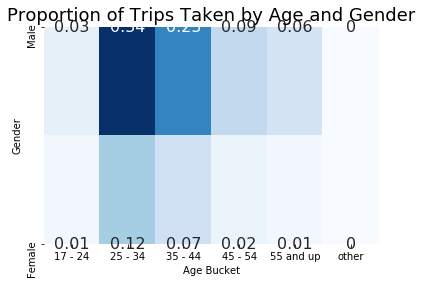

In [26]:
ax = sns.heatmap(gender_age, annot=True, linewidths=0, cbar=False, cmap="Blues", annot_kws={"size": 16})

ax.set_title('Proportion of Trips Taken by Age and Gender', fontsize=18)

In [29]:
monthly = pd.DataFrame(JC_master['month'].value_counts())
monthly.sort_index(inplace = True)
monthly

,month
1,19100
2,17970
3,22561
4,30960
5,33548
6,36093
7,40286
8,44553
9,45466


Text(0.5, 1.0, 'Total trips by Month')

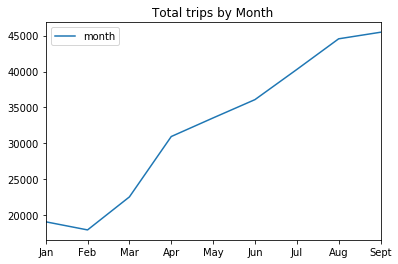

In [33]:
monthly.plot()
plt.xticks(monthly.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept'])
plt.title("Total trips by Month")

In [38]:
JC_master.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,month,dayyear,dayweek,daymonth,hour,date,age,age_cat
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,...,1993,1,1,1,1,1,3,2019-01-01,26,25 - 34
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,...,1972,2,1,1,1,1,5,2019-01-01,47,45 - 54
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,...,1985,1,1,1,1,1,10,2019-01-01,34,25 - 34
5,737,2019-01-01 12:56:53.204,2019-01-01 13:09:11.040,3183,Exchange Place,40.716247,-74.033459,3205,JC Medical Center,40.716540,...,1993,1,1,1,1,1,12,2019-01-01,26,25 - 34
6,917,2019-01-01 13:03:44.776,2019-01-01 13:19:02.769,3183,Exchange Place,40.716247,-74.033459,3277,Communipaw & Berry Lane,40.714358,...,1986,1,1,1,1,1,13,2019-01-01,33,25 - 34


In [37]:
JC_master.groupby('dayweek').size().reset_index().rename(columns={'dayweek':'weekday', 0:'trips'})

,weekday,trips
0,0,43069
1,1,46518
2,2,47184
3,3,44328
4,4,45440
5,5,34365
6,6,29633


In [41]:
#0 indicates Monday
weekday_counts = pd.DataFrame({'weekday': [0, 1, 2, 3, 4, 5, 6],
         'days': [39, 39, 39, 39, 39, 39, 40]})

weekday_trips = JC_master.groupby('dayweek').size().reset_index().rename(columns={'dayweek': 'weekday', 0:'trips'})
weekday_trips

,weekday,trips
0,0,43069
1,1,46518
2,2,47184
3,3,44328
4,4,45440
5,5,34365
6,6,29633


In [42]:
weekday = pd.merge(weekday_trips, weekday_counts, on = 'weekday', how = 'outer')
weekday['average'] = weekday['trips'] / weekday['days']
weekday

,weekday,trips,days,average
0,0,43069,39,1104.333333
1,1,46518,39,1192.769231
2,2,47184,39,1209.846154
3,3,44328,39,1136.615385
4,4,45440,39,1165.128205
5,5,34365,39,881.153846
6,6,29633,40,740.825000


Text(0.5, 1.0, 'Average number of trips by day')

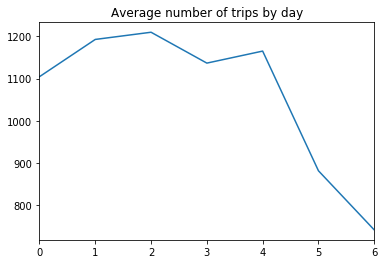

In [44]:
ax = weekday.average.plot()
plt.title("Average number of trips by day")

In [48]:
start_point = JC_master.groupby(['start station name', 'month']).size().reset_index().rename(columns={'start station name': 'station', 0:'startcount'})
start_point.head()

,station,month,startcount
0,5 Corners Library,1,103
1,5 Corners Library,2,111
2,5 Corners Library,3,171
3,5 Corners Library,4,256
4,5 Corners Library,5,218


In [53]:
end_point = JC_master.groupby(['end station name', 'month']).size().reset_index().rename(columns={'end station name': 'station', 0:'endcount'})
end_point = end_point[end_point['station'].isin(JC_master['start station name'].unique())].reset_index(drop = True)
end_point.head()

,station,month,endcount
0,5 Corners Library,1,69
1,5 Corners Library,2,87
2,5 Corners Library,3,151
3,5 Corners Library,4,217
4,5 Corners Library,5,188


In [58]:
trips = JC_master.groupby(['start station name','end station name']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending = False).reset_index(drop = True)
trips.head(25)

,start station name,end station name,count
0,Hamilton Park,Grove St PATH,6263
1,Grove St PATH,Hamilton Park,4633
2,Brunswick & 6th,Grove St PATH,3725
3,Jersey & 6th St,Grove St PATH,3233
4,Brunswick St,Grove St PATH,3167
5,Grove St PATH,Marin Light Rail,3166
6,Marin Light Rail,Grove St PATH,3163
7,Dixon Mills,Grove St PATH,2833
8,Monmouth and 6th,Grove St PATH,2813
9,Grove St PATH,Brunswick & 6th,2730
